In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [4]:
barts_hotspot = os.path.join('barts_hotspots.csv')
barts_to_all = os.path.join('barts_to_all.csv')
hotspot = os.path.join('hotspots_to_all.csv')
q1 = os.path.join('hours_q1.csv')
q2 = os.path.join('hours_q2.csv')

barts_hotspot = pd.read_csv(barts_hotspot)
barts_to_all = pd.read_csv(barts_to_all)
hotspot = pd.read_csv(hotspot)
q1 = pd.read_csv(q1)
q2 = pd.read_csv(q2)

In [5]:
barts_hotspot[['Origin Movement ID', 'Origin Display Name', 'Destination Movement ID', 'Destination Display Name']]
barts_hotspot['Origin Movement ID'].unique()

array([3396, 3603, 3792, 3394, 3692, 3760])

In [6]:
barts_hotspot['Destination Movement ID'].unique()

array([3603, 3394, 3396, 3792, 3692, 3760])

In [7]:
barts_hotspot['Destination Display Name'].unique()

array(['Embarcadero, San Francisco, CA',
       "Fisherman's Wharf, San Francisco, CA",
       'The Palace Of Fine Arts, 3601 Lyon St, San Francisco, CA',
       'Oracle Park, 24 Willie Mays Plaza, San Francisco, CA',
       '2nd Street and Stevenson Street (Montgomery BART, San Francisco, CA',
       'Powell BART Station, Market St and Powell St, San Francisco, CA',
       "Fisherman's Wharf, 286-298 Jefferson St, San Francisco, CA"],
      dtype=object)

In [8]:
barts_hotspot['Destination Display Name'] = barts_hotspot['Destination Display Name'].replace("Fisherman's Wharf, San Francisco, CA","Fisherman's Wharf, 286-298 Jefferson St, San Francisco, CA")
barts_hotspot['Destination Display Name'].nunique()

6

In [9]:
column_vals = barts_hotspot.columns.values[5:]
for i in column_vals: 
    barts_hotspot[i] = barts_hotspot.groupby(['Origin Movement ID', 'Destination Movement ID']).transform(lambda x: x.fillna(x.mean()))


Compare and contrast travel times between different BART stations and Hotspots based on these factors: time of day, day of the week, and the direction of travel.

a. Consider restructuring the data on the basis of some of the previously listed factors.

Looking at the average travel time for BART stations. 

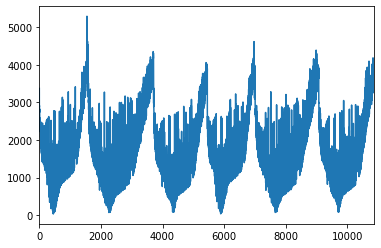

In [10]:
barts_to_all['Mean Travel Time (Seconds)'].plot()
#Looking at average mean travel 


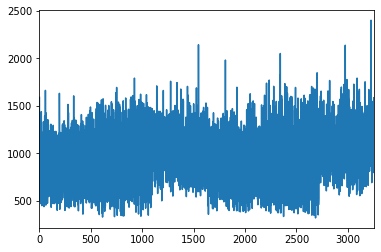

In [11]:
barts_hotspot['AM Mean Travel Time (Seconds)'].plot()

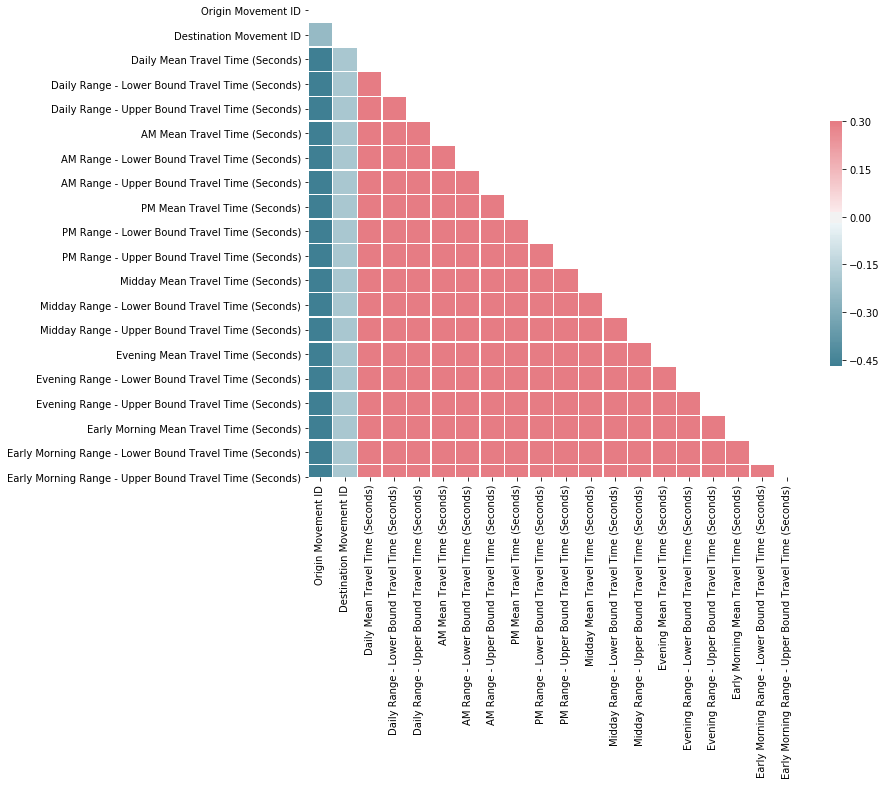

In [12]:
corr = barts_hotspot.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


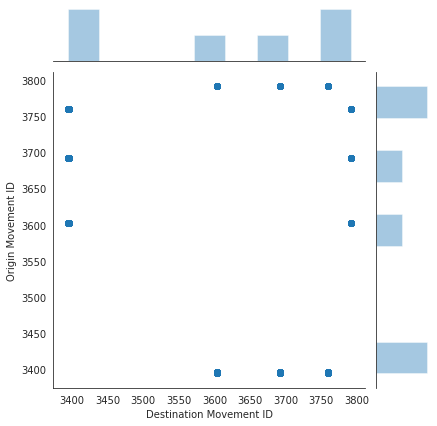

In [13]:
with sns.axes_style('white'):
    sns.jointplot("Destination Movement ID", "Origin Movement ID", barts_hotspot)
#looking at direction of travel

In [14]:
barts_hotspot.columns

Index(['Date', 'Origin Movement ID', 'Origin Display Name',
       'Destination Movement ID', 'Destination Display Name',
       'Daily Mean Travel Time (Seconds)',
       'Daily Range - Lower Bound Travel Time (Seconds)',
       'Daily Range - Upper Bound Travel Time (Seconds)',
       'AM Mean Travel Time (Seconds)',
       'AM Range - Lower Bound Travel Time (Seconds)',
       'AM Range - Upper Bound Travel Time (Seconds)',
       'PM Mean Travel Time (Seconds)',
       'PM Range - Lower Bound Travel Time (Seconds)',
       'PM Range - Upper Bound Travel Time (Seconds)',
       'Midday Mean Travel Time (Seconds)',
       'Midday Range - Lower Bound Travel Time (Seconds)',
       'Midday Range - Upper Bound Travel Time (Seconds)',
       'Evening Mean Travel Time (Seconds)',
       'Evening Range - Lower Bound Travel Time (Seconds)',
       'Evening Range - Upper Bound Travel Time (Seconds)',
       'Early Morning Mean Travel Time (Seconds)',
       'Early Morning Range - Lower Bound

In [15]:
barts_hotspot['Date'] = pd.to_datetime(barts_hotspot['Date'])

barts_hotspot['day_of_week'] = barts_hotspot['Date'].dt.day_name()
barts_hotspot.head()

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Midday Mean Travel Time (Seconds),Midday Range - Lower Bound Travel Time (Seconds),Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),day_of_week
0,2019-06-09,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1588.0,1588.0,1588.0,1588.0,1588.0,...,1588.0,1588.0,1588.0,1588.0,1588.0,1588.0,1588.0,1588.0,1588.0,Sunday
1,2019-04-28,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, 286-298 Jefferson St, San F...",639.0,639.0,639.0,639.0,639.0,...,639.0,639.0,639.0,639.0,639.0,639.0,639.0,639.0,639.0,Sunday
2,2019-05-18,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, 286-298 Jefferson St, San F...",730.0,730.0,730.0,730.0,730.0,...,730.0,730.0,730.0,730.0,730.0,730.0,730.0,730.0,730.0,Saturday
3,2019-04-18,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",512.0,512.0,512.0,512.0,512.0,...,512.0,512.0,512.0,512.0,512.0,512.0,512.0,512.0,512.0,Thursday
4,2019-04-08,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",505.0,505.0,505.0,505.0,505.0,...,505.0,505.0,505.0,505.0,505.0,505.0,505.0,505.0,505.0,Monday


In [16]:
from matplotlib.pyplot import pie, axis, show


In [17]:
barts_hotspot['Origin Movement ID'].unique()
(barts_hotspot['Origin Movement ID'] == 3394).sum()

543

In [18]:
#hotspots 
# 3394: Fisherman's Wharf
# 3792: oracle park 
# 3396: palace of fine arts 
# df['color'] = np.where(df['Set']=='Z', 'green', 'red')

hotspots = (barts_hotspot['Origin Movement ID'] == 3792) | (barts_hotspot['Origin Movement ID'] == 3396) | (barts_hotspot['Origin Movement ID'] == 3394)
barts = (barts_hotspot['Origin Movement ID'] == 3603) | (barts_hotspot['Origin Movement ID'] == 3692) | (barts_hotspot['Origin Movement ID'] == 3760)
hotspots = barts_hotspot[hotspots]
barts = barts_hotspot[barts]

hotspots.head()


,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Midday Mean Travel Time (Seconds),Midday Range - Lower Bound Travel Time (Seconds),Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),day_of_week
0,2019-06-09,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1588.0,1588.0,1588.0,1588.0,1588.0,...,1588.0,1588.0,1588.0,1588.0,1588.0,1588.0,1588.0,1588.0,1588.0,Sunday
3,2019-04-18,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",512.0,512.0,512.0,512.0,512.0,...,512.0,512.0,512.0,512.0,512.0,512.0,512.0,512.0,512.0,Thursday
4,2019-04-08,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",505.0,505.0,505.0,505.0,505.0,...,505.0,505.0,505.0,505.0,505.0,505.0,505.0,505.0,505.0,Monday
5,2019-06-30,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",616.0,616.0,616.0,616.0,616.0,...,616.0,616.0,616.0,616.0,616.0,616.0,616.0,616.0,616.0,Sunday
8,2019-05-15,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",878.0,878.0,878.0,878.0,878.0,...,878.0,878.0,878.0,878.0,878.0,878.0,878.0,878.0,878.0,Wednesday


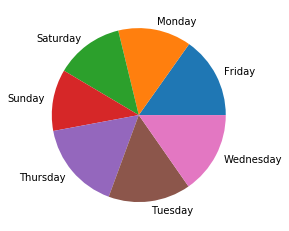

In [19]:
one = (hotspots['Destination Movement ID'] == 3603) & (hotspots['Origin Movement ID'] == 3792)
one = hotspots[one]
sums = one['Daily Mean Travel Time (Seconds)'].groupby(one.day_of_week).sum()
pie(sums, labels=sums.index);
#Mean travel time from Oracle Park to 3603

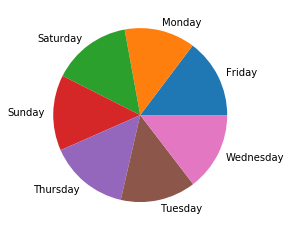

In [20]:
one = (hotspots['Destination Movement ID'] == 3760) & (hotspots['Origin Movement ID'] == 3396)
one = hotspots[one]
sums = one['Daily Mean Travel Time (Seconds)'].groupby(one.day_of_week).sum()
pie(sums, labels=sums.index);
#Mean travel time from Palace of Fine Arts to 3760 on different days of the week 

In [21]:
hotspots.columns

Index(['Date', 'Origin Movement ID', 'Origin Display Name',
       'Destination Movement ID', 'Destination Display Name',
       'Daily Mean Travel Time (Seconds)',
       'Daily Range - Lower Bound Travel Time (Seconds)',
       'Daily Range - Upper Bound Travel Time (Seconds)',
       'AM Mean Travel Time (Seconds)',
       'AM Range - Lower Bound Travel Time (Seconds)',
       'AM Range - Upper Bound Travel Time (Seconds)',
       'PM Mean Travel Time (Seconds)',
       'PM Range - Lower Bound Travel Time (Seconds)',
       'PM Range - Upper Bound Travel Time (Seconds)',
       'Midday Mean Travel Time (Seconds)',
       'Midday Range - Lower Bound Travel Time (Seconds)',
       'Midday Range - Upper Bound Travel Time (Seconds)',
       'Evening Mean Travel Time (Seconds)',
       'Evening Range - Lower Bound Travel Time (Seconds)',
       'Evening Range - Upper Bound Travel Time (Seconds)',
       'Early Morning Mean Travel Time (Seconds)',
       'Early Morning Range - Lower Bound

In [29]:
first = hotspots[hotspots['Origin Movement ID'] == 3792]
first = first[first['Destination Movement ID'] == 3692]
# first['Destination Movement ID'].unique()
first

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Midday Mean Travel Time (Seconds),Midday Range - Lower Bound Travel Time (Seconds),Midday Range - Upper Bound Travel Time (Seconds),Evening Mean Travel Time (Seconds),Evening Range - Lower Bound Travel Time (Seconds),Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),day_of_week
546,2019-05-28,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3692,2nd Street and Stevenson Street (Montgomery BA...,555.0,555.0,555.0,555.0,555.0,...,555.0,555.0,555.0,555.0,555.0,555.0,555.0,555.0,555.0,Tuesday
547,2019-06-28,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3692,2nd Street and Stevenson Street (Montgomery BA...,670.0,670.0,670.0,670.0,670.0,...,670.0,670.0,670.0,670.0,670.0,670.0,670.0,670.0,670.0,Friday
550,2019-04-16,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3692,2nd Street and Stevenson Street (Montgomery BA...,503.0,503.0,503.0,503.0,503.0,...,503.0,503.0,503.0,503.0,503.0,503.0,503.0,503.0,503.0,Tuesday
552,2019-06-15,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3692,2nd Street and Stevenson Street (Montgomery BA...,554.0,554.0,554.0,554.0,554.0,...,554.0,554.0,554.0,554.0,554.0,554.0,554.0,554.0,554.0,Saturday
555,2019-05-21,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3692,2nd Street and Stevenson Street (Montgomery BA...,585.0,585.0,585.0,585.0,585.0,...,585.0,585.0,585.0,585.0,585.0,585.0,585.0,585.0,585.0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,2019-01-31,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3692,2nd Street and Stevenson Street (Montgomery BA...,639.0,639.0,639.0,639.0,639.0,...,639.0,639.0,639.0,639.0,639.0,639.0,639.0,639.0,639.0,Thursday
2707,2019-01-21,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3692,2nd Street and Stevenson Street (Montgomery BA...,460.0,460.0,460.0,460.0,460.0,...,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,460.0,Monday
2713,2019-02-12,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3692,2nd Street and Stevenson Street (Montgomery BA...,722.0,722.0,722.0,722.0,722.0,...,722.0,722.0,722.0,722.0,722.0,722.0,722.0,722.0,722.0,Tuesday
2715,2019-02-17,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3692,2nd Street and Stevenson Street (Montgomery BA...,458.0,458.0,458.0,458.0,458.0,...,458.0,458.0,458.0,458.0,458.0,458.0,458.0,458.0,458.0,Sunday


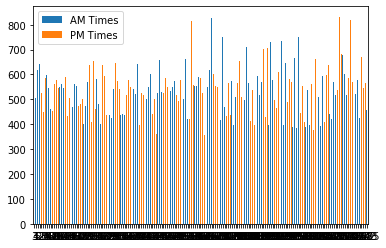

In [255]:
df = pd.DataFrame({'AM Times': first['AM Mean Travel Time (Seconds)'],
                   'PM Times': first['PM Mean Travel Time (Seconds)']}, 
                  )
ax = df.plot.bar(rot=0)

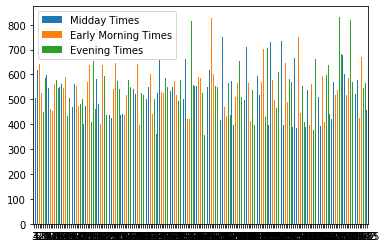

In [257]:
df = pd.DataFrame({'Midday Times': first['Midday Mean Travel Time (Seconds)'],
                    'Early Morning Times': first['Early Morning Mean Travel Time (Seconds)'],
                   'Evening Times': first['Evening Mean Travel Time (Seconds)'],
                  }, 
                  )
ax = df.plot.bar(rot=0)